# 광고클릭분석
- 광고클릭을 유도하기 위한 효율적인 방법에 대해 찾아보자
- Data URL: https://www.kaggle.com/datasets/tbyrnes/advertising?resource=download
- 변수설명
    * 'Daily Time Spent on Site': '일일 사이트 체류 시간'
    * 'Age': '연령'
    * 'Area Income': '지역 소득'
    * 'Daily Internet Usage': '일일 인터넷 사용량'
    * 'Ad Topic Line': '광고 주제 라인', 
    * 'City': '도시'
    * 'Gender': '성별'
    * 'Country': '국가'
    * 'Timestamp': '일시'
    * 'Clicked on Ad': '광고 클릭'
- 참고링크: https://www.kaggle.com/code/zohebabai/exploratory-project-on-advertising-dataset/notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('D:/Hyun.JH/AD/advertising_ef.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
df.shape

(1009, 10)

In [4]:
#원핫인코딩
df = pd.get_dummies(data=df, columns=['Gender'], prefix='sex')

In [5]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,sex_Female,sex_Male
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,27-03-2016 00:53,0,1,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,04-04-2016 01:39,0,0,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,13-03-2016 20:35,0,1,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,10-01-2016 02:31,0,0,1
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,03-06-2016 03:36,0,1,0


In [6]:
#필요한 컬럼만 추출
cols = df.columns[[0, 1, 2, 3, 9, 10, 8]]
df1 = df[cols]

In [7]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,sex_Female,sex_Male,Clicked on Ad
0,68.95,35.0,61833.90,256.09,1,0,0
1,NaN,31.0,68441.85,193.77,0,1,0
2,69.47,26.0,59785.94,236.50,1,0,0
3,74.15,29.0,54806.18,245.89,0,1,0
4,68.37,35.0,73889.99,225.58,1,0,0


In [8]:
#결측값 확인
df1.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
sex_Female                   0
sex_Male                     0
Clicked on Ad                0
dtype: int64

In [9]:
#결측값 제거
df1.dropna(inplace=True)
df1 = df1.set_index(cols[0]).reset_index()

In [10]:
df1.shape

(980, 7)

In [11]:
#균형 데이터 확인
df1['Clicked on Ad'].value_counts()

0    490
1    490
Name: Clicked on Ad, dtype: int64

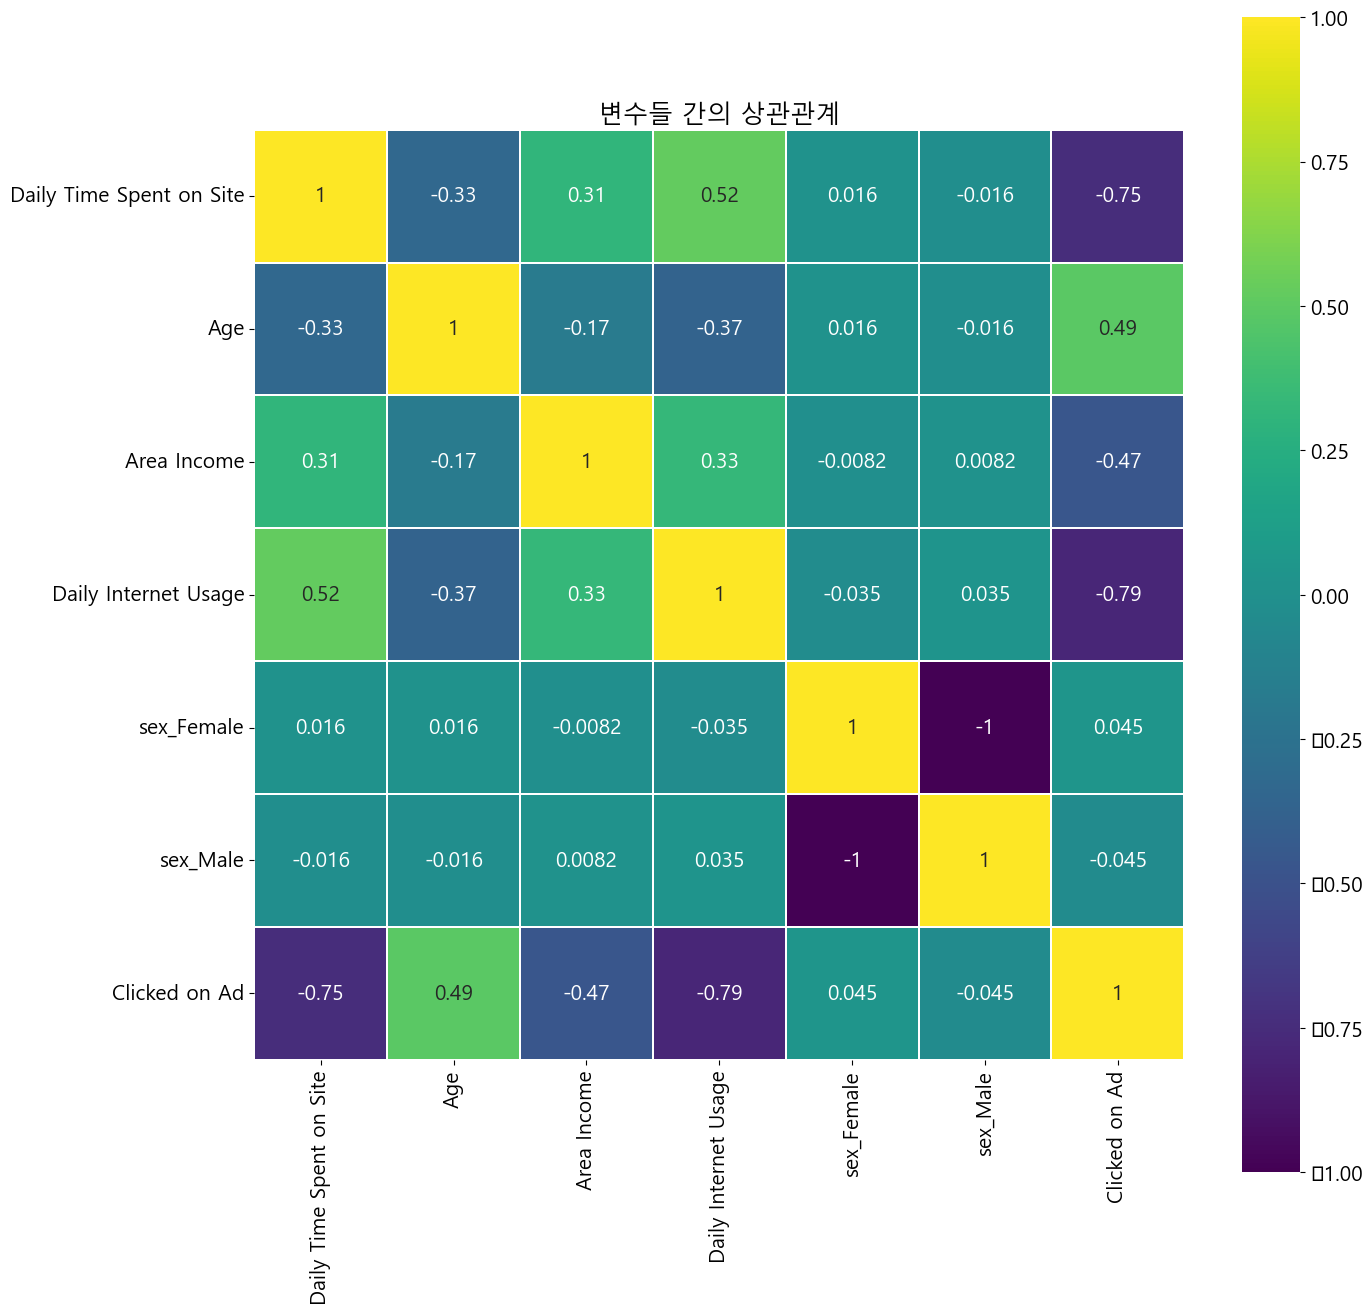

In [12]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns

#상관계수 행렬 그래프
plt.figure(figsize=(15,15))
plt.rc('font', size=15)
sns.heatmap(df1.corr(), linewidths=0.01, square=True, annot=True,
            cmap=plt.cm.viridis, linecolor='white')
plt.title('변수들 간의 상관관계')
plt.show()

In [13]:
X = df1[cols[0:-1]]
y = df1[cols[-1]]

In [14]:
import statsmodels.api as sm
model = sm.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.093281
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.865      
Dependent Variable:   Clicked on Ad      AIC:                194.8312   
Date:                 2023-05-12 16:58   BIC:                224.1566   
No. Observations:     980                Log-Likelihood:     -91.416    
Df Model:             5                  LL-Null:            -679.28    
Df Residuals:         974                LLR p-value:        5.2881e-252
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       10.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.1905   0.0206 -9.2673 0.0000 -0.2308 -0.1502
Age                       0.1689   0.0259  6.5266 0.0000  0.1182  0.2196
Area Income              -0.0001   0.0000 -7.2600 0.0000 -0.0002 -0.0001
Daily Internet Usage     -0.0636   0.0068 -9.3762 0.0000 -0.0769 -0.0503
sex_Female               27.3992   2.7428  9.9895 0.0000 22.0234 32.7750
sex_Male                 26.9194   2.7142  9.9180 0.0000 21.5996 32.2391
========================================================================

"""

In [15]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.454752,Daily Time Spent on Site
1,1.194809,Age
2,1.156368,Area Income
3,1.516927,Daily Internet Usage
4,39.007325,sex_Female
5,35.712932,sex_Male


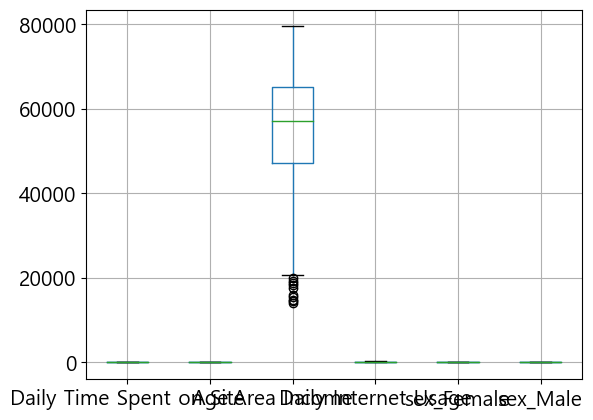

In [16]:
#스케일링 전 박스 플롯
X.boxplot()
plt.show()

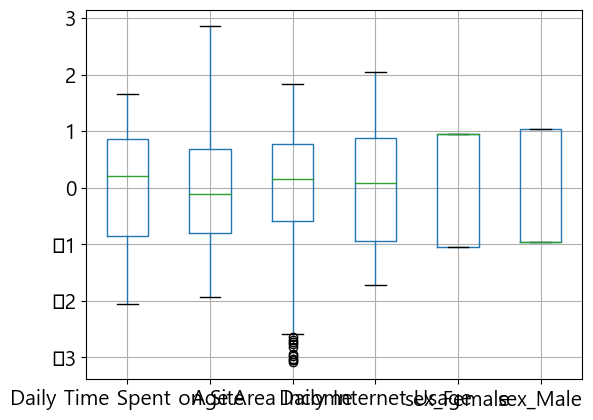

In [17]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns=X.columns)
X = X_scaled
X.boxplot()
plt.show()

In [18]:
#알고리즘별 정확도를 저장할 리스트
scores = []
aucs = []

In [19]:
#로지스틱회귀분석
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ('clf', LogisticRegression(random_state=0)),
])
params = {
    'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
logit = gs.fit(X, y)
print(logit.best_params_)
print(logit.best_score_)

{'clf__C': 1.0}
0.9693877551020409


In [20]:
logit.score(X, y)

0.9704081632653061

In [21]:
scores.append(logit.score(X, y))

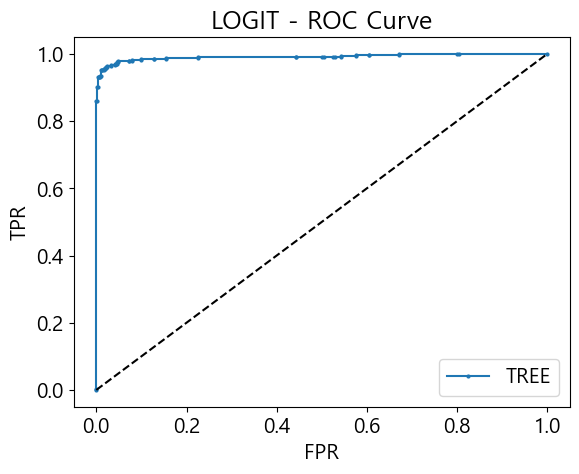

AUC: 0.9914410662224072


In [22]:
#ROC커브
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y, logit.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='TREE')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LOGIT - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))


In [23]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(2,10)),
    'clf__criterion' : ["gini", "entropy"]
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
tree = gs.fit(X, y)
print(tree.best_params_)
print(tree.best_score_)

{'clf__criterion': 'entropy', 'clf__max_depth': 6}
0.95


In [24]:
tree.score(X, y)

0.9826530612244898

In [25]:
scores.append(tree.score(X, y))

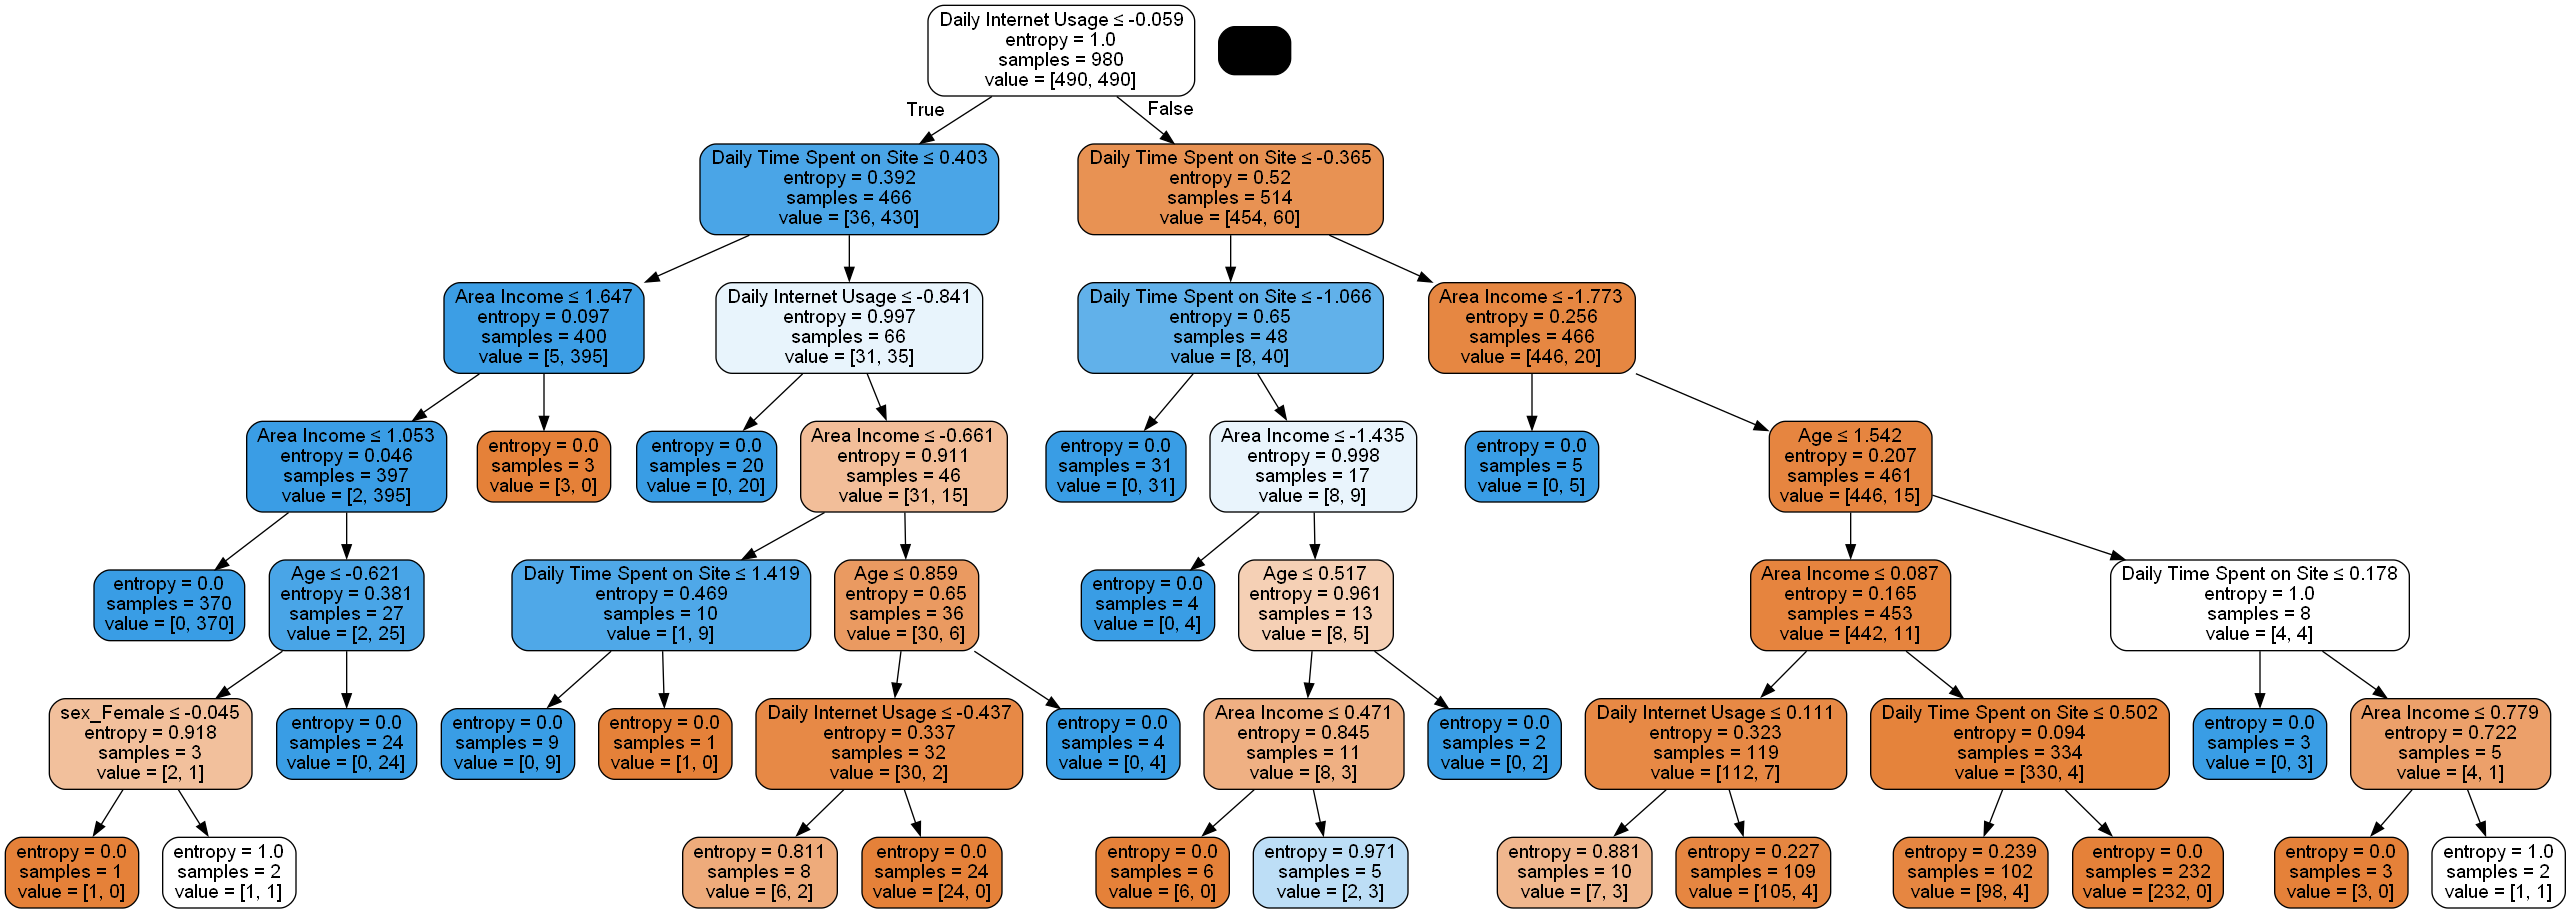

In [26]:
#트리 구조 시각화
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(tree.best_estimator_['clf'], out_file=None,
                           feature_names=X.columns, 
                           filled=True, rounded=True, 
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

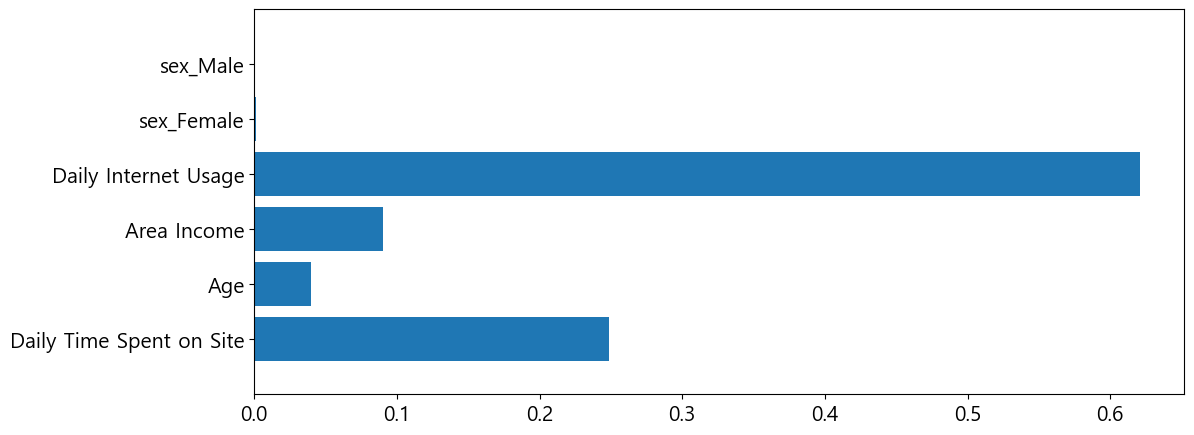

In [27]:
#트리모형의 특성 중요도
import numpy as np
def plot_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.ylim(-1, n_features)

plt.figure(figsize=(12, 5))
plot_tree(tree.best_estimator_['clf'])
plt.show()

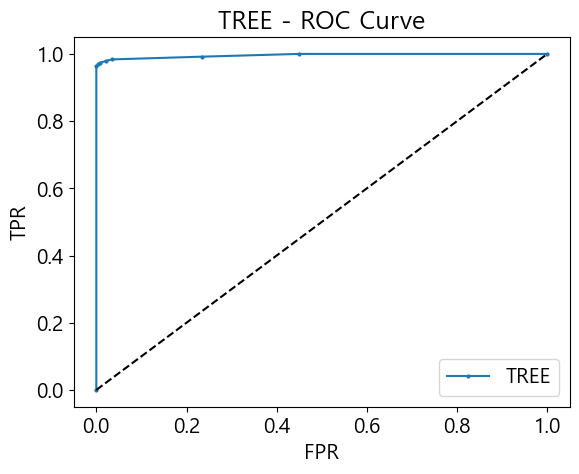

AUC: 0.9958621407746772


In [28]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, tree.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='TREE')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('TREE - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

In [29]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([
    ('clf', RandomForestClassifier(random_state=0)),
])
params = {
    'clf__max_depth': list(range(2, 10)),
    'clf__n_estimators': list(range(10, 110, 10)),
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
RF = gs.fit(X, y)
print(RF.best_params_)
print(RF.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 90}
0.9642857142857142


In [30]:
RF.score(X, y)

0.9775510204081632

In [31]:
scores.append(RF.score(X, y))

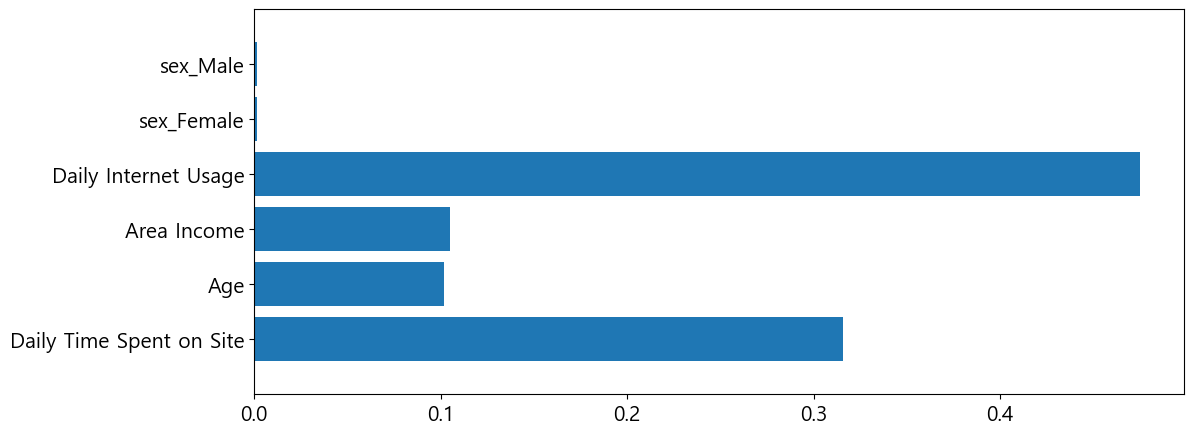

In [32]:
#랜덤포레스트 구조 시각화
plt.figure(figsize=(12, 5))
plot_tree(RF.best_estimator_['clf'])
plt.show()

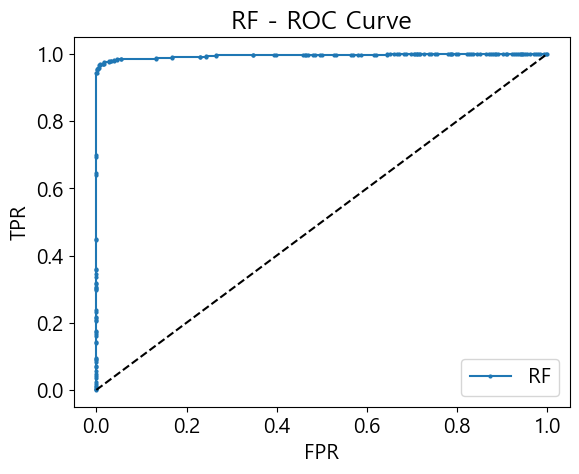

AUC: 0.9952353186172427


In [33]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, RF.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='RF')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('RF - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

In [34]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
    ('clf', KNeighborsClassifier()),
])
params = {
    'clf__n_neighbors': list(range(1, 11)),
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
knn = gs.fit(X, y)
print(knn.best_params_)
print(knn.best_score_)

{'clf__n_neighbors': 3}
0.9581632653061224


In [35]:
knn.score(X, y)

0.9714285714285714

In [36]:
scores.append(knn.score(X, y))

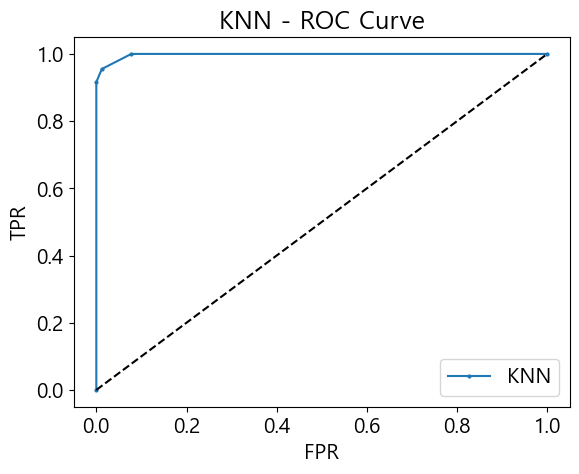

AUC: 0.997746772178259


In [37]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, knn.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='KNN')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('KNN - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

In [49]:
#SVM
from sklearn.svm import SVC
pipe = Pipeline([
    ('clf', SVC(random_state=0)),
])
params = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__gamma': [0.0001, 0.001, 0.01, 0.1],
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
svm = gs.fit(X, y)
print(svm.best_params_)
print(svm.best_score_)

{'clf__C': 1000, 'clf__gamma': 0.0001}
0.9693877551020409


In [39]:
svm.score(X, y)

0.9693877551020408

In [40]:
scores.append(svm.score(X, y))

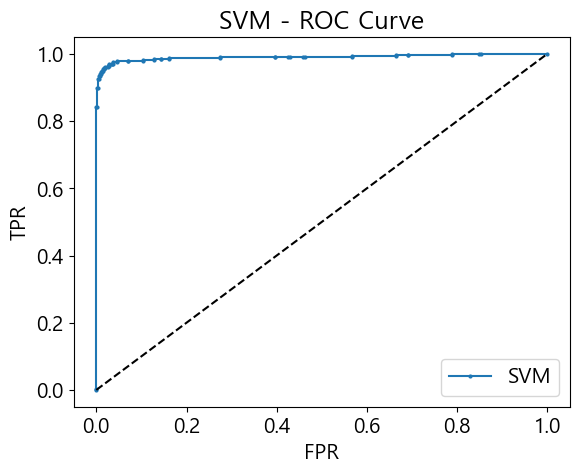

AUC: 0.9906955435235317


In [51]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, svm.decision_function(X))
plt.plot(fpr, tpr, 'o-', ms=2, label='SVM')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('SVM - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

In [52]:
#ANN
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
    ('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
    'clf__hidden_layer_sizes': [(50, ), (100, ), (50, 50), (100, 100)],
    'clf__activation': ['tanh', 'relu'],
    'clf__alpha': [0.001, 0.01, 0.1]
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
mlp = gs.fit(X, y)
print(mlp.best_params_)
print(mlp.best_score_)

{'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (50,)}
0.9693877551020409


In [53]:
mlp.score(X, y)

0.9714285714285714

In [54]:
scores.append(mlp.score(X, y))

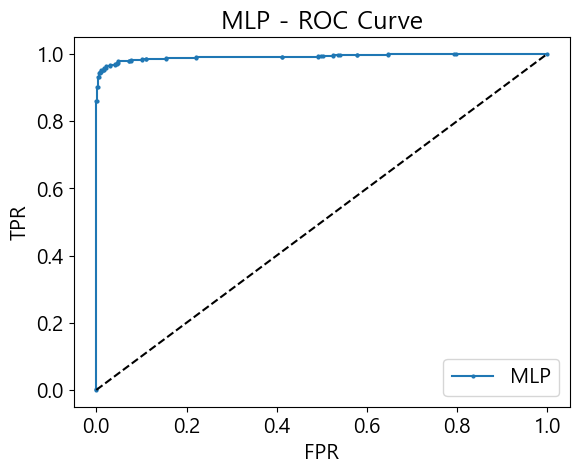

AUC: 0.9919283631820074


In [55]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, mlp.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='MLP')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('MLP - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

In [56]:
from scikeras.wrappers import KerasClassifier
from keras import models
from keras import layers
def create_network(loss='binary_crossentropy', optimizer='adam'):
    network = models.Sequential()
    network.add(layers.Dense(units=64, activation='relu', input_shape=(X.shape[1], ), name='hidden-1'))
    network.add(layers.Dense(units=32, activation='relu', name='hidden-2'))
    network.add(layers.Dense(units=32, activation='relu', name='hidden-3'))
    network.add(layers.Dense(units=1, activation='sigmoid', name='output'))
    network.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return network

In [57]:
#DNN
neural_network = KerasClassifier(model=create_network, verbose=0)

# 하이퍼파라미터 탐색영역을 정의
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', neural_network),
])
params = {
    'clf__epochs': [50, 100, 200],
    'clf__batch_size': [32, 64],
    'clf__loss': ['binary_crossentropy', 'mse'],
    'clf__optimizer': ['rmsprop', 'adam'],
}
gs = GridSearchCV(pipe, params, scoring='accuracy', cv=5)
DNN = gs.fit(X, y)
print(DNN.best_params_)
print(DNN.best_score_)

{'clf__batch_size': 32, 'clf__epochs': 50, 'clf__loss': 'binary_crossentropy', 'clf__optimizer': 'rmsprop'}
0.9622448979591838


In [58]:
DNN.score(X, y)

0.9836734693877551

In [59]:
scores.append(DNN.score(X, y))

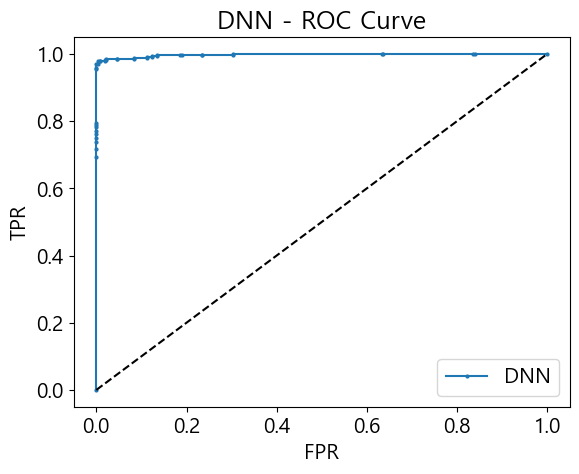

AUC: 0.9975260308204915


In [70]:
#ROC커브
fpr, tpr, thresholds = roc_curve(y, DNN.predict_proba(X)[:, 1])
plt.plot(fpr, tpr, 'o-', ms=2, label='DNN')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DNN - ROC Curve')
plt.show()
aucs.append(auc(fpr, tpr))
print('AUC:', auc(fpr, tpr))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['LOGIT', 'Tree', 'RF', 'KNN', 'SVM', 'ANN', 'DNN']
[0.97040816 0.98265306 0.97755102 0.97142857 0.96938776 0.97142857
 0.98367347]
최적의 모형(학습용): DNN
최고 정확도: 0.9836734693877551


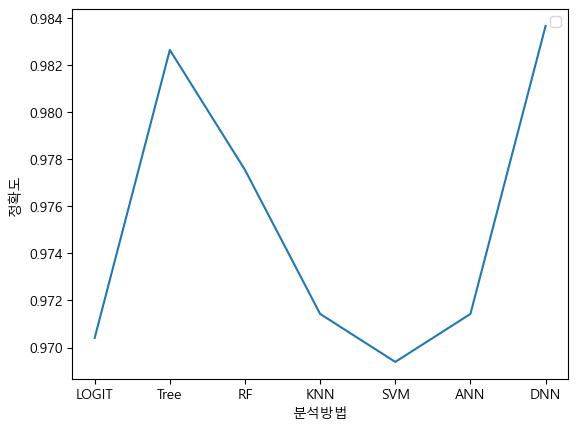

In [71]:
#알고리즘별 예측도 그래프
methods = ['LOGIT', 'Tree', 'RF', 'KNN', 'SVM', 'ANN', 'DNN']
scores_arr = np.array(scores)
max_rate = np.max(scores_arr)
idx = np.argmax(scores_arr)

print(methods)
print(scores_arr)
print('최적의 모형(학습용):', methods[idx])
print('최고 정확도:', max_rate)

plt.rcParams["font.size"]=10
plt.plot(methods, scores_arr)
plt.xlabel('분석방법')
plt.ylabel("정확도")
plt.legend()
plt.show()

In [87]:
result_df = pd.DataFrame({'Score': np.round(scores, 3), 'Auc': np.round(aucs, 3)}, index=methods)
result_df

,Score,Auc
LOGIT,0.970,0.991
Tree,0.983,0.996
RF,0.978,0.995
KNN,0.971,0.998
SVM,0.969,0.991
ANN,0.971,0.992
DNN,0.984,0.998
